# ANALYSIS OF THE METROPOLITAN MUSEUM OF ART    COLLECTION

In [23]:
import pandas
import numpy

### DATA COLLECTION

In [24]:
data = pandas.read_csv("MetObjects.csv")

/tmp/ipykernel_29/1229616624.py:1: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pandas.read_csv("MetObjects.csv")


### DATA MANAGEMENT/REPRESENTATION

In [25]:
data = data.drop(columns = ['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Title', 'Dynasty', 'Reign','Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Begin Date','Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Begin Date',
       'Object End Date', 'Dimensions', 'Credit Line', 'Geography Type',
       'City', 'State', 'County', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL', 
       'Tags Wikidata URL'])
data

,Department,AccessionYear,Object Name,Culture,Period,Artist Nationality,Object Date,Medium,Country
0,The American Wing,1979.0,Coin,NaN,NaN,American,1853,Gold,NaN
1,The American Wing,1980.0,Coin,NaN,NaN,,1901,Gold,NaN
2,The American Wing,1967.0,Coin,NaN,NaN,NaN,1909–27,Gold,NaN
3,The American Wing,1967.0,Coin,NaN,NaN,NaN,1909–27,Gold,NaN
4,The American Wing,1967.0,Coin,NaN,NaN,NaN,1909–27,Gold,NaN
...,...,...,...,...,...,...,...,...,...
477799,Drawings and Prints,1923,Drawing,NaN,NaN,,1904,"Graphite on cardstock adhered to canvas, perfo...",NaN
477800,Drawings and Prints,1923,Drawing,NaN,NaN,,1904,Graphite and ink,NaN
477801,Drawings and Prints,1953,Print,NaN,NaN,,after 1773,Etching,NaN
477802,Drawings and Prints,1923,Drawing,NaN,NaN,,1904,Graphite,NaN


In [41]:
cleandata = data.replace("\|", numpy.nan, regex=True)
cleandata = cleandata.replace("", numpy.nan, regex = True)
cleandata = cleandata.dropna(subset = ["Artist Nationality", "Medium"])
cleandata = cleandata.dropna(subset = ["Country"])
cleandata = cleandata[(cleandata["Artist Nationality"] != " ")]
cleandata = cleandata[(cleandata["Artist Nationality"] != "  ")]
cleandata = cleandata[(cleandata["Artist Nationality"] != "")]
cleandata

,Department,AccessionYear,Object Name,Culture,Period,Artist Nationality,Object Date,Medium,Country
32,The American Wing,1964.0,Bust,American,NaN,American,1876,Pressed glass,United States
36,The American Wing,1938.0,Figure,British (American market),NaN,French,ca. 1785,"Earthenware, basalt",England
37,The American Wing,1938.0,Figure,British (American market),NaN,French,ca. 1785,"Earthenware, basalt",England
40,The American Wing,1946.0,Ale glass,American,NaN,American,1850–70,Pressed glass,United States
99,The American Wing,1989.0,Andiron,American,NaN,American,1792–1814,Brass and iron,United States
...,...,...,...,...,...,...,...,...,...
387716,Islamic Art,2014,Cutout,NaN,NaN,American,ca. 1892,Brass; chased,India
387717,Islamic Art,2014,Cutout,NaN,NaN,American,ca. 1892,Brass; chased,India
391616,Islamic Art,2014,Print,NaN,NaN,American (born Iran),1973,Photo etching,USA
392113,The American Wing,2014,Platter,American,NaN,American,ca. 1800–1850,Redware,United States


In [42]:
cleandata["Artist Nationality"].value_counts()[:10]

American     628
French       229
British      151
German       127
Italian       93
Scottish      53
Hungarian     42
Spanish       28
Iranian       22
Austrian      20
Name: Artist Nationality, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

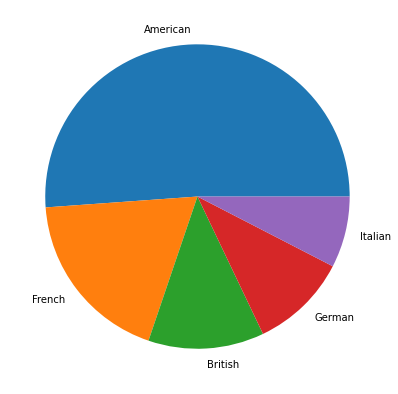

In [47]:
import matplotlib.pyplot as plt
values = cleandata["Artist Nationality"].value_counts()[:5].values
labels = cleandata["Artist Nationality"].value_counts()[:5].index
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = labels)
plt.show

In [43]:
cleandata["Country"].value_counts()[:10]

United States     805
France            225
Germany           113
England           111
Italy             100
United Kingdom     53
Spain              28
Austria            23
Nigeria            23
Belgium            17
Name: Country, dtype: int64

In [26]:
a = data["Period"].unique()
for x in range(len(a)):
    print(a[x])

nan
Edo period (1615–1868)
Qing dynasty (1644–1911)
late Ming dynasty (1368–1644)
Ming (1368–1644) or Qing (1644–1911) dynasty
Ming dynasty (1368–1644)
Ming dynasty (1368–1644) or later
Ming (1368–1644) or Qing dynasty (1644–1911)
Ming (1368–1644)–Qing (1644–1911) dynasty
late Ming (1368–1644)–early Qing (1644–1911) dynasty
late Yuan (1271–1368)–early Ming (1368–1644) dynasty
Southern Song dynasty (1127–1279)
Song dynasty (960–1279)
Yuan dynasty (1271–1368) (?)
Goryeo dynasty (918–1392)
Ming dynasty (1368–1644) (?)
Southern Song (1127–1279) or Yuan (1271–1368) dynasty
Yuan dynasty (1271–1368)
Dali kingdom (938–1253)
Song dynasty (960–1279
Yuan (1271–1368)–Ming (1368–1644) dynasty
Meiji period (1868–1912)
Ming (1368–1644) or Qing dynasty (1644–1911); or Japan, Edo period (1603–1868)
Northern Song (960–1127)–Jin (1115–1234) dynasty
Heian period (794–1185)
Muromachi (1392–1573) or Momoyama period (1573–1615)
Kamakura period (1185–1333)
Shōwa period (1926–89)
Qing dynasty (1644–1911), Qian